In [359]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [786]:
# Native libraries
import os
import math
import warnings

# Essential Libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker


In [903]:
importance_collection_ordinary = pd.read_csv('RF_model_importance_timeseries_ordinary.csv')

In [904]:
importance_collection_different = pd.read_csv('RF_model_importance_timeseries.csv').dropna()

In [905]:
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

SEED=23


In [906]:
A = ['LSOA_Count','Adress_Count',
      'Building Site', 'Commercial Premises', 'Email Complaint (1d)','Non Noise Complaint (45m)', 'Property Alarm', 'Residential Premises','Street']

B = ['Year', 'Month', 'Weekday','Season', 'days','Time',]
   
C = ['bef_todays_count','bef_yesterday_count', 'bef_2_7days_count', 'bef_7_30days_count','bef_30_365days_count', 'bef_365_begindays_count', ]

D = ['year_month_cl_0', 'year_month_cl_1','year_month_cl_2', 'month_cl_0', 'month_cl_1', 'month_cl_2',
      
       'time_cl_0', 'time_cl_1', 'time_cl_2', 'weekday_cl_0', 'weekday_cl_1','weekday_cl_2', 'weekday_cl_3', 'weekday_cl_4', 'weekday_cl_5']
      
    
    

In [907]:
A1 = ['LSOA_Count','Adress_Count',
      'Building Site', 'Commercial Premises', 'Email Complaint (1d)','Non Noise Complaint (45m)', 'Property Alarm', 'Residential Premises','Street']

B1 = ['Year', 'Month', 'Weekday','Season', 'days','Time',]
   
C1 = ['Preceding_Complaints_Today','Preceding_Complaints_0-2nd days','Preceding_Complaints_2nd-7th days','Preceding_Complaints_7th-30th days','Preceding_Complaints_30th-365th days','Preceding_Complaints_365th days-begin' ]

D1 = ['Trend_cl_0', 'Trend_cl_1', 'Trend_cl_2','Month_cl_0','Month_cl_1','Month_cl_2','Time_cl_0','Time_cl_1','Time_cl_2','Weekday_cl_0','Weekday_cl_1','Weekday_cl_2', 'Weekday_cl_3',]
      

In [908]:
listnew = A1+B1+C1+D1
listoriginal = A+B+C+D

zipbObj = zip(listoriginal, listnew )
# Create a dictionary from zip object
dictfeature_name = dict(zipbObj)

In [909]:
dictfeature_name

{'LSOA_Count': 'LSOA_Count',
 'Adress_Count': 'Adress_Count',
 'Building Site': 'Building Site',
 'Commercial Premises': 'Commercial Premises',
 'Email Complaint (1d)': 'Email Complaint (1d)',
 'Non Noise Complaint (45m)': 'Non Noise Complaint (45m)',
 'Property Alarm': 'Property Alarm',
 'Residential Premises': 'Residential Premises',
 'Street': 'Street',
 'Year': 'Year',
 'Month': 'Month',
 'Weekday': 'Weekday',
 'Season': 'Season',
 'days': 'days',
 'Time': 'Time',
 'bef_todays_count': 'Preceding_Complaints_Today',
 'bef_yesterday_count': 'Preceding_Complaints_0-2nd days',
 'bef_2_7days_count': 'Preceding_Complaints_2nd-7th days',
 'bef_7_30days_count': 'Preceding_Complaints_7th-30th days',
 'bef_30_365days_count': 'Preceding_Complaints_30th-365th days',
 'bef_365_begindays_count': 'Preceding_Complaints_365th days-begin',
 'year_month_cl_0': 'Trend_cl_0',
 'year_month_cl_1': 'Trend_cl_1',
 'year_month_cl_2': 'Trend_cl_2',
 'month_cl_0': 'Month_cl_0',
 'month_cl_1': 'Month_cl_1',
 'm

In [910]:
importance_collection = importance_collection_ordinary

In [911]:
df_1 = importance_collection.loc[importance_collection.Type=='0-2 days'].sort_values(by = 'Importance', ascending = False).reset_index()
df_1.Importance.sum()
df_1['proportion'] = df_1.Importance/ df_1.Importance.sum()
df_1.group = 'A'
df_1.loc[df_1.Feature.isin(A),'group'] = 'A'
df_1.loc[df_1.Feature.isin(B),'group'] = 'B'
df_1.loc[df_1.Feature.isin(C),'group'] = 'C'
df_1.loc[df_1.Feature.isin(D),'group'] = 'D'
df_1

,index,Feature,Importance,Type,proportion,group
0,68,Adress_Count,0.107264,0-2 days,0.190289,A
1,69,Residential Premises,0.060871,0-2 days,0.107987,A
2,70,Street,0.054924,0-2 days,0.097437,A
3,71,Commercial Premises,0.036990,0-2 days,0.065621,A
4,72,Building Site,0.024535,0-2 days,0.043526,A
5,73,time_cl_1,0.021422,0-2 days,0.038003,D
6,74,bef_30_365days_count,0.020083,0-2 days,0.035628,C
7,75,Time,0.016720,0-2 days,0.029662,B
8,76,bef_7_30days_count,0.016346,0-2 days,0.028998,C
9,77,Weekday,0.015350,0-2 days,0.027231,B


In [912]:
df_2 = importance_collection.loc[importance_collection.Type=='2-7 days'].sort_values(by = 'Importance', ascending = False).reset_index()
df_2.Importance.sum()
df_2['proportion'] = df_2.Importance/ df_2.Importance.sum()
df_2.group = 'A'
df_2.loc[df_2.Feature.isin(A),'group'] = 'A'
df_2.loc[df_2.Feature.isin(B),'group'] = 'B'
df_2.loc[df_2.Feature.isin(C),'group'] = 'C'
df_2.loc[df_2.Feature.isin(D),'group'] = 'D'
df_2

,index,Feature,Importance,Type,proportion,group
0,34,Adress_Count,0.161777,2-7 days,0.354299,A
1,35,Street,0.035564,2-7 days,0.077887,A
2,36,Residential Premises,0.030132,2-7 days,0.065991,A
3,37,Commercial Premises,0.023432,2-7 days,0.051317,A
4,38,bef_30_365days_count,0.021512,2-7 days,0.047112,C
5,39,bef_365_begindays_count,0.017565,2-7 days,0.038468,C
6,40,Building Site,0.016442,2-7 days,0.036009,A
7,41,bef_7_30days_count,0.015356,2-7 days,0.033630,C
8,42,bef_2_7days_count,0.015319,2-7 days,0.033549,C
9,43,time_cl_1,0.011299,2-7 days,0.024745,D


In [913]:
df_3 = importance_collection.loc[importance_collection.Type=='7-30 days'].sort_values(by = 'Importance', ascending = False).reset_index()
df_3.Importance.sum()
df_3['proportion'] = df_3.Importance/ df_3.Importance.sum()
df_3.group = 'A'
df_3.loc[df_3.Feature.isin(A),'group'] = 'A'
df_3.loc[df_3.Feature.isin(B),'group'] = 'B'
df_3.loc[df_3.Feature.isin(C),'group'] = 'C'
df_3.loc[df_3.Feature.isin(D),'group'] = 'D'
df_3

,index,Feature,Importance,Type,proportion,group
0,0,Adress_Count,0.103772,7-30 days,0.181282,A
1,1,Residential Premises,0.080758,7-30 days,0.141078,A
2,2,Street,0.045182,7-30 days,0.078930,A
3,3,Commercial Premises,0.030760,7-30 days,0.053735,A
4,4,bef_30_365days_count,0.030140,7-30 days,0.052652,C
5,5,Building Site,0.025746,7-30 days,0.044976,A
6,6,Weekday,0.017464,7-30 days,0.030508,B
7,7,Property Alarm,0.016338,7-30 days,0.028541,A
8,8,Time,0.014563,7-30 days,0.025440,B
9,9,days,0.013605,7-30 days,0.023767,B


In [914]:
df_all  = pd.concat([df_1, df_2,df_3], axis=1)
df_all

,index,Feature,Importance,Type,proportion,group,index,Feature,Importance,Type,proportion,group,index,Feature,Importance,Type,proportion,group
0,68,Adress_Count,0.107264,0-2 days,0.190289,A,34,Adress_Count,0.161777,2-7 days,0.354299,A,0,Adress_Count,0.103772,7-30 days,0.181282,A
1,69,Residential Premises,0.060871,0-2 days,0.107987,A,35,Street,0.035564,2-7 days,0.077887,A,1,Residential Premises,0.080758,7-30 days,0.141078,A
2,70,Street,0.054924,0-2 days,0.097437,A,36,Residential Premises,0.030132,2-7 days,0.065991,A,2,Street,0.045182,7-30 days,0.078930,A
3,71,Commercial Premises,0.036990,0-2 days,0.065621,A,37,Commercial Premises,0.023432,2-7 days,0.051317,A,3,Commercial Premises,0.030760,7-30 days,0.053735,A
4,72,Building Site,0.024535,0-2 days,0.043526,A,38,bef_30_365days_count,0.021512,2-7 days,0.047112,C,4,bef_30_365days_count,0.030140,7-30 days,0.052652,C
5,73,time_cl_1,0.021422,0-2 days,0.038003,D,39,bef_365_begindays_count,0.017565,2-7 days,0.038468,C,5,Building Site,0.025746,7-30 days,0.044976,A
6,74,bef_30_365days_count,0.020083,0-2 days,0.035628,C,40,Building Site,0.016442,2-7 days,0.036009,A,6,Weekday,0.017464,7-30 days,0.030508,B
7,75,Time,0.016720,0-2 days,0.029662,B,41,bef_7_30days_count,0.015356,2-7 days,0.033630,C,7,Property Alarm,0.016338,7-30 days,0.028541,A
8,76,bef_7_30days_count,0.016346,0-2 days,0.028998,C,42,bef_2_7days_count,0.015319,2-7 days,0.033549,C,8,Time,0.014563,7-30 days,0.025440,B
9,77,Weekday,0.015350,0-2 days,0.027231,B,43,time_cl_1,0.011299,2-7 days,0.024745,D,9,days,0.013605,7-30 days,0.023767,B


In [915]:
df_all.columns = ['index_1', 'Feature_1', 'Importance_1', 'Type_1', 'proportion_1','group_1','index_2','Feature_2', 'Importance_2', 'Type_2', 'proportion_2','group_2', 'index_3', 'Feature_3','Importance_3', 'Type_3','proportion_3','group_3']

In [916]:
df_all_select = df_all[['Feature_1','Feature_2','Feature_3','proportion_1','proportion_2','proportion_3','group_1','group_2','group_3','index_1','index_2','index_3']]
#df_all_select = df_all[['group_1','group_2','group_3','proportion_3']]

In [917]:
df_all_select['link_col_1'] = ''
df_all_select['link_col_2'] = ''
df_all_select['link_col_3'] = ''

node_color_set = ['group_1','group_2','group_3']
link_color_set =['link_col_1','link_col_2','link_col_3']
order = [0,1,2]

for i in order :
    df_all_select.loc[df_all_select[node_color_set[i]] =='A',link_color_set[i]] = 'rgb(42, 9, 68, 0.1)'
    df_all_select.loc[df_all_select[node_color_set[i]] =='A',link_color_set[i]] = 'lightblue'
    df_all_select.loc[df_all_select[node_color_set[i]] =='B',link_color_set[i]] = 'rgb(63, 167, 150, 0.1)'
    df_all_select.loc[df_all_select[node_color_set[i]] =='B',link_color_set[i]] = 'lightcoral'
    df_all_select.loc[df_all_select[node_color_set[i]] =='C',link_color_set[i]] = 'rgb(254, 194, 96, 0.1)'
    df_all_select.loc[df_all_select[node_color_set[i]] =='C',link_color_set[i]] = 'lightcyan'
    df_all_select.loc[df_all_select[node_color_set[i]] =='D',link_color_set[i]] = 'rgb(161, 0, 53, 0.1)'
    df_all_select.loc[df_all_select[node_color_set[i]] =='D',link_color_set[i]] = 'lightgoldenrodyellow'

for i in node_color_set:
    for e in range(len(df_all_select[i])):
    # replace hardik with shardul
        if df_all_select[i][e] == 'A':
            df_all_select[i][e] = ' lightblue'
        elif df_all_select[i][e] == 'B':
            df_all_select[i][e] = 'lightcoral'
        elif df_all_select[i][e] == 'C':
            df_all_select[i][e] = 'lightcyan'
        elif df_all_select[i][e] == 'D':
            df_all_select[i][e] = 'lightgoldenrodyellow'
        

In [919]:
for i in ['Feature_1','Feature_2','Feature_3']:
    for e in dictfeature_name.keys():
        df_all_select.loc[df_all_select[i] == e, i] = dictfeature_name[e]

In [920]:
for i in ['Feature_1','Feature_2','Feature_3']:
    if i == 'Feature_1':
        df_all_select[i] = df_all_select[i]+''
    if i == 'Feature_2':
        df_all_select[i] = df_all_select[i]+'.'
    if i == 'Feature_3':
        df_all_select[i] = df_all_select[i]+'..'

df_all_select['x'] = 0.0
df_all_select['y']=  0.0
df_all_select['z']=  0.0

a = 0.01
b = 0.01
c = 0.01
for i in range(len(df_all_select.Feature_1)):
    if i == 0:
        df_all_select['x'][i] = 0.01
        df_all_select['y'][i] = 0.01
        df_all_select['z'][i] = 0.01
    elif i >0:
        a = a + df_all_select.proportion_1.loc[i-1]
        b = b + df_all_select.proportion_2.loc[i-1]
        c = c + df_all_select.proportion_3.loc[i-1]
        df_all_select['x'][i]= a
        df_all_select['y'][i]= b
        df_all_select['z'][i]= b
a = 0.01
b = 0.01
c = 0.01

for i in range(len(df_all_select.Feature_1)):
    if i == 0:
        df_all_select['x'][i] = 0.01
        df_all_select['y'][i] = 0.01
        df_all_select['z'][i] = 0.01
    elif i >0:
        a = a + 0.03
        b = b + 0.03
        c = c + 0.03
        df_all_select['x'][i]= a
        df_all_select['y'][i]= b 
        df_all_select['z'][i]= c 

In [921]:

df_all_select

,Feature_1,Feature_2,Feature_3,proportion_1,proportion_2,proportion_3,group_1,group_2,group_3,index_1,index_2,index_3,link_col_1,link_col_2,link_col_3,x,y,z
0,Adress_Count,Adress_Count.,Adress_Count..,0.190289,0.354299,0.181282,lightblue,lightblue,lightblue,68,34,0,lightblue,lightblue,lightblue,0.01,0.01,0.01
1,Residential Premises,Street.,Residential Premises..,0.107987,0.077887,0.141078,lightblue,lightblue,lightblue,69,35,1,lightblue,lightblue,lightblue,0.04,0.04,0.04
2,Street,Residential Premises.,Street..,0.097437,0.065991,0.078930,lightblue,lightblue,lightblue,70,36,2,lightblue,lightblue,lightblue,0.07,0.07,0.07
3,Commercial Premises,Commercial Premises.,Commercial Premises..,0.065621,0.051317,0.053735,lightblue,lightblue,lightblue,71,37,3,lightblue,lightblue,lightblue,0.10,0.10,0.10
4,Building Site,Preceding_Complaints_30th-365th days.,Preceding_Complaints_30th-365th days..,0.043526,0.047112,0.052652,lightblue,lightcyan,lightcyan,72,38,4,lightblue,lightcyan,lightcyan,0.13,0.13,0.13
5,Time_cl_1,Preceding_Complaints_365th days-begin.,Building Site..,0.038003,0.038468,0.044976,lightgoldenrodyellow,lightcyan,lightblue,73,39,5,lightgoldenrodyellow,lightcyan,lightblue,0.16,0.16,0.16
6,Preceding_Complaints_30th-365th days,Building Site.,Weekday..,0.035628,0.036009,0.030508,lightcyan,lightblue,lightcoral,74,40,6,lightcyan,lightblue,lightcoral,0.19,0.19,0.19
7,Time,Preceding_Complaints_7th-30th days.,Property Alarm..,0.029662,0.033630,0.028541,lightcoral,lightcyan,lightblue,75,41,7,lightcoral,lightcyan,lightblue,0.22,0.22,0.22
8,Preceding_Complaints_7th-30th days,Preceding_Complaints_2nd-7th days.,Time..,0.028998,0.033549,0.025440,lightcyan,lightcyan,lightcoral,76,42,8,lightcyan,lightcyan,lightcoral,0.25,0.25,0.25
9,Weekday,Time_cl_1.,days..,0.027231,0.024745,0.023767,lightcoral,lightgoldenrodyellow,lightcoral,77,43,9,lightcoral,lightgoldenrodyellow,lightcoral,0.28,0.28,0.28


In [922]:
dictfeature_name.keys()

dict_keys(['LSOA_Count', 'Adress_Count', 'Building Site', 'Commercial Premises', 'Email Complaint (1d)', 'Non Noise Complaint (45m)', 'Property Alarm', 'Residential Premises', 'Street', 'Year', 'Month', 'Weekday', 'Season', 'days', 'Time', 'bef_todays_count', 'bef_yesterday_count', 'bef_2_7days_count', 'bef_7_30days_count', 'bef_30_365days_count', 'bef_365_begindays_count', 'year_month_cl_0', 'year_month_cl_1', 'year_month_cl_2', 'month_cl_0', 'month_cl_1', 'month_cl_2', 'time_cl_0', 'time_cl_1', 'time_cl_2', 'weekday_cl_0', 'weekday_cl_1', 'weekday_cl_2', 'weekday_cl_3'])

In [923]:
df_all_select['x1'] = 0.001
df_all_select['x2'] = 0.5
df_all_select['x3'] = 0.99
df_all_select['new_value'] = 1
df_all_select

,Feature_1,Feature_2,Feature_3,proportion_1,proportion_2,proportion_3,group_1,group_2,group_3,index_1,...,link_col_1,link_col_2,link_col_3,x,y,z,x1,x2,x3,new_value
0,Adress_Count,Adress_Count.,Adress_Count..,0.190289,0.354299,0.181282,lightblue,lightblue,lightblue,68,...,lightblue,lightblue,lightblue,0.01,0.01,0.01,0.001,0.5,0.99,1
1,Residential Premises,Street.,Residential Premises..,0.107987,0.077887,0.141078,lightblue,lightblue,lightblue,69,...,lightblue,lightblue,lightblue,0.04,0.04,0.04,0.001,0.5,0.99,1
2,Street,Residential Premises.,Street..,0.097437,0.065991,0.078930,lightblue,lightblue,lightblue,70,...,lightblue,lightblue,lightblue,0.07,0.07,0.07,0.001,0.5,0.99,1
3,Commercial Premises,Commercial Premises.,Commercial Premises..,0.065621,0.051317,0.053735,lightblue,lightblue,lightblue,71,...,lightblue,lightblue,lightblue,0.10,0.10,0.10,0.001,0.5,0.99,1
4,Building Site,Preceding_Complaints_30th-365th days.,Preceding_Complaints_30th-365th days..,0.043526,0.047112,0.052652,lightblue,lightcyan,lightcyan,72,...,lightblue,lightcyan,lightcyan,0.13,0.13,0.13,0.001,0.5,0.99,1
5,Time_cl_1,Preceding_Complaints_365th days-begin.,Building Site..,0.038003,0.038468,0.044976,lightgoldenrodyellow,lightcyan,lightblue,73,...,lightgoldenrodyellow,lightcyan,lightblue,0.16,0.16,0.16,0.001,0.5,0.99,1
6,Preceding_Complaints_30th-365th days,Building Site.,Weekday..,0.035628,0.036009,0.030508,lightcyan,lightblue,lightcoral,74,...,lightcyan,lightblue,lightcoral,0.19,0.19,0.19,0.001,0.5,0.99,1
7,Time,Preceding_Complaints_7th-30th days.,Property Alarm..,0.029662,0.033630,0.028541,lightcoral,lightcyan,lightblue,75,...,lightcoral,lightcyan,lightblue,0.22,0.22,0.22,0.001,0.5,0.99,1
8,Preceding_Complaints_7th-30th days,Preceding_Complaints_2nd-7th days.,Time..,0.028998,0.033549,0.025440,lightcyan,lightcyan,lightcoral,76,...,lightcyan,lightcyan,lightcoral,0.25,0.25,0.25,0.001,0.5,0.99,1
9,Weekday,Time_cl_1.,days..,0.027231,0.024745,0.023767,lightcoral,lightgoldenrodyellow,lightcoral,77,...,lightcoral,lightgoldenrodyellow,lightcoral,0.28,0.28,0.28,0.001,0.5,0.99,1


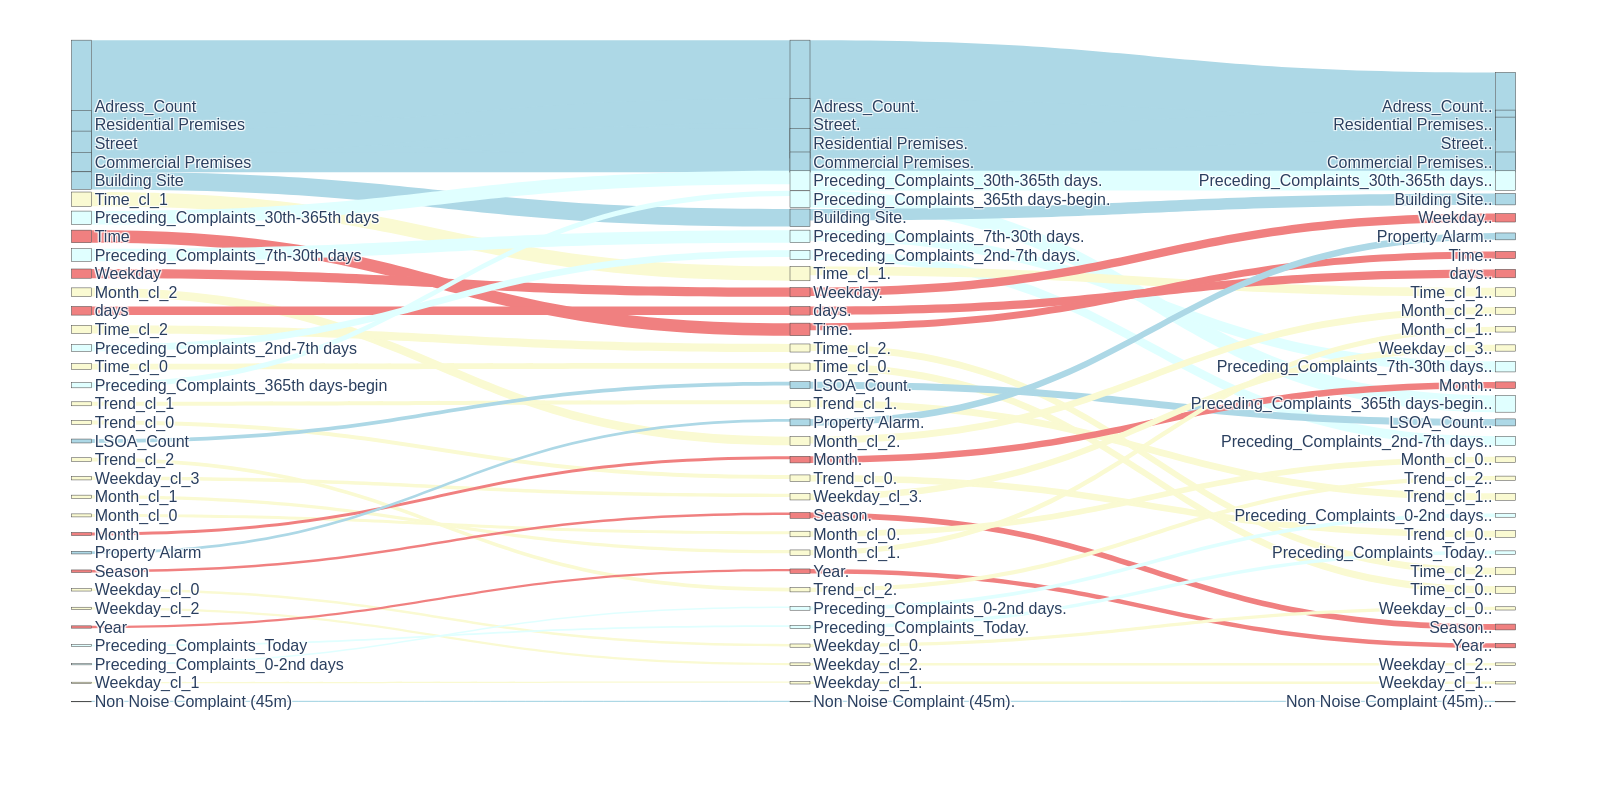

In [924]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import io





from itertools import chain
label = list(chain.from_iterable(zip(df_all_select['Feature_1'],df_all_select['Feature_2'],df_all_select['Feature_3'])))
x = list(chain.from_iterable(zip(df_all_select['x1'],df_all_select['x2'],df_all_select['x3'])))
y = list(chain.from_iterable(zip(df_all_select['x'],df_all_select['y'],df_all_select['z'])))
proportion = list(chain.from_iterable(zip(df_all_select['proportion_1'],df_all_select['proportion_2'],df_all_select['proportion_3'])))
color = list(chain.from_iterable(zip(df_all_select['group_1'],df_all_select['group_2'],df_all_select['group_3'])))

nodes = pd.Series(index=label, data=range(len(label)))

fig = go.Figure(
    go.Sankey(
        node={"label": label,
             "color" : color ,
             "x": x,
             "y": y,
             'pad':5,
             'thickness':20},
        link={
            "source": nodes.loc[list(df_all_select["Feature_1"])+list(df_all_select["Feature_2"])],
            "target": nodes.loc[list(df_all_select["Feature_1"]+'.')+list(df_all_select["Feature_2"]+'.')],
            #"target": nodes.loc[df["target"]],
            "value": list(df_all_select['proportion_2'])+list(df_all_select['proportion_3']),
            #"value":list(df_all_select['new_value'])+list(df_all_select['new_value']),
            "color" :  list(df_all_select['link_col_1'])+list(df_all_select['link_col_2']),
            
        },
    )
)


fig.update_layout(  font_size=16,autosize=False,
    width=1600,
    height=800,)

fig.show("png") #fig.show()


In [927]:
importance_collection = importance_collection_different

In [928]:
df_1 = importance_collection.loc[importance_collection.Type=='0-2 days'].sort_values(by = 'Importance', ascending = False).reset_index()
df_1.Importance.sum()
df_1['proportion'] = abs(df_1.Importance)/ sum(abs(number) for number in df_1.Importance)
df_1.group = 'A'
df_1.loc[df_1.Feature.isin(A),'group'] = 'A'
df_1.loc[df_1.Feature.isin(B),'group'] = 'B'
df_1.loc[df_1.Feature.isin(C),'group'] = 'C'
df_1.loc[df_1.Feature.isin(D),'group'] = 'D'
#df_1 =df_1.sort_values(by = 'proportion', ascending = False).drop(columns = 'index').reset_index()
df_1

,index,Feature,Importance,Type,proportion,group
0,68,Adress_Count,0.077685,0-2 days,0.162404,A
1,69,time_cl_1,0.034592,0-2 days,0.072316,D
2,70,month_cl_2,0.026092,0-2 days,0.054546,D
3,71,Street,0.024753,0-2 days,0.051747,A
4,72,time_cl_0,0.021889,0-2 days,0.045760,D
5,73,time_cl_2,0.021359,0-2 days,0.044652,D
6,74,weekday_cl_3,0.018993,0-2 days,0.039706,D
7,75,month_cl_1,0.018215,0-2 days,0.038079,D
8,76,Residential Premises,0.017810,0-2 days,0.037233,A
9,77,month_cl_0,0.017000,0-2 days,0.035539,D


In [929]:
df_2 = importance_collection.loc[importance_collection.Type=='2-7 days'].sort_values(by = 'Importance', ascending = False).reset_index()
df_2.Importance.sum()
df_2['proportion'] = abs(df_2.Importance)/ sum(abs(number) for number in df_2.Importance)
df_2.group = 'A'
df_2.loc[df_2.Feature.isin(A),'group'] = 'A'
df_2.loc[df_2.Feature.isin(B),'group'] = 'B'
df_2.loc[df_2.Feature.isin(C),'group'] = 'C'
df_2.loc[df_2.Feature.isin(D),'group'] = 'D'
#df_2 =df_2.sort_values(by = 'proportion', ascending = False).drop(columns = 'index').reset_index()
df_2

,index,Feature,Importance,Type,proportion,group
0,34,Adress_Count,0.167319,2-7 days,0.393795,A
1,35,time_cl_1,0.023649,2-7 days,0.055659,D
2,36,month_cl_2,0.018724,2-7 days,0.044068,D
3,37,time_cl_0,0.015863,2-7 days,0.037334,D
4,38,time_cl_2,0.015682,2-7 days,0.036908,D
5,39,month_cl_1,0.013509,2-7 days,0.031794,D
6,40,Street,0.013146,2-7 days,0.030940,A
7,41,month_cl_0,0.012386,2-7 days,0.029151,D
8,42,bef_2_7days_count,0.011336,2-7 days,0.026680,C
9,43,year_month_cl_0,0.011155,2-7 days,0.026254,D


In [930]:
df_3 = importance_collection.loc[importance_collection.Type=='7-30 days'].sort_values(by = 'Importance', ascending = False).reset_index()
df_3.Importance.sum()
df_3['proportion'] = abs(df_3.Importance)/ sum(abs(number) for number in df_3.Importance)
df_3.group = 'A'
df_3.loc[df_3.Feature.isin(A),'group'] = 'A'
df_3.loc[df_3.Feature.isin(B),'group'] = 'B'
df_3.loc[df_3.Feature.isin(C),'group'] = 'C'
df_3.loc[df_3.Feature.isin(D),'group'] = 'D'
#df_3 =df_3.sort_values(by = 'proportion', ascending = False).drop(columns = 'index').reset_index()
df_3

,index,Feature,Importance,Type,proportion,group
0,0,Adress_Count,0.042928,7-30 days,0.087430,A
1,1,weekday_cl_3,0.038309,7-30 days,0.078023,D
2,2,month_cl_1,0.035576,7-30 days,0.072457,D
3,3,month_cl_2,0.034196,7-30 days,0.069646,D
4,4,Residential Premises,0.031858,7-30 days,0.064884,A
5,5,time_cl_1,0.031182,7-30 days,0.063507,D
6,6,month_cl_0,0.030422,7-30 days,0.061960,D
7,7,weekday_cl_0,0.027464,7-30 days,0.055935,D
8,8,time_cl_0,0.024844,7-30 days,0.050599,D
9,9,time_cl_2,0.022563,7-30 days,0.045953,D


In [931]:
df_all  = pd.concat([df_1, df_2,df_3], axis=1)
df_all

,index,Feature,Importance,Type,proportion,group,index,Feature,Importance,Type,proportion,group,index,Feature,Importance,Type,proportion,group
0,68,Adress_Count,0.077685,0-2 days,0.162404,A,34,Adress_Count,0.167319,2-7 days,0.393795,A,0,Adress_Count,0.042928,7-30 days,0.087430,A
1,69,time_cl_1,0.034592,0-2 days,0.072316,D,35,time_cl_1,0.023649,2-7 days,0.055659,D,1,weekday_cl_3,0.038309,7-30 days,0.078023,D
2,70,month_cl_2,0.026092,0-2 days,0.054546,D,36,month_cl_2,0.018724,2-7 days,0.044068,D,2,month_cl_1,0.035576,7-30 days,0.072457,D
3,71,Street,0.024753,0-2 days,0.051747,A,37,time_cl_0,0.015863,2-7 days,0.037334,D,3,month_cl_2,0.034196,7-30 days,0.069646,D
4,72,time_cl_0,0.021889,0-2 days,0.045760,D,38,time_cl_2,0.015682,2-7 days,0.036908,D,4,Residential Premises,0.031858,7-30 days,0.064884,A
5,73,time_cl_2,0.021359,0-2 days,0.044652,D,39,month_cl_1,0.013509,2-7 days,0.031794,D,5,time_cl_1,0.031182,7-30 days,0.063507,D
6,74,weekday_cl_3,0.018993,0-2 days,0.039706,D,40,Street,0.013146,2-7 days,0.030940,A,6,month_cl_0,0.030422,7-30 days,0.061960,D
7,75,month_cl_1,0.018215,0-2 days,0.038079,D,41,month_cl_0,0.012386,2-7 days,0.029151,D,7,weekday_cl_0,0.027464,7-30 days,0.055935,D
8,76,Residential Premises,0.017810,0-2 days,0.037233,A,42,bef_2_7days_count,0.011336,2-7 days,0.026680,C,8,time_cl_0,0.024844,7-30 days,0.050599,D
9,77,month_cl_0,0.017000,0-2 days,0.035539,D,43,year_month_cl_0,0.011155,2-7 days,0.026254,D,9,time_cl_2,0.022563,7-30 days,0.045953,D


In [932]:
df_all.columns = ['index_1', 'Feature_1', 'Importance_1', 'Type_1', 'proportion_1','group_1','index_2','Feature_2', 'Importance_2', 'Type_2', 'proportion_2','group_2', 'index_3', 'Feature_3','Importance_3', 'Type_3','proportion_3','group_3']

In [933]:
df_all_select = df_all[['Feature_1','Feature_2','Feature_3','proportion_1','proportion_2','proportion_3','group_1','group_2','group_3','index_1','index_2','index_3']]
#df_all_select = df_all[['group_1','group_2','group_3','proportion_3']]

In [934]:
df_all_select['link_col_1'] = ''
df_all_select['link_col_2'] = ''
df_all_select['link_col_3'] = ''

node_color_set = ['group_1','group_2','group_3']
link_color_set =['link_col_1','link_col_2','link_col_3']
order = [0,1,2]

for i in order :
    df_all_select.loc[df_all_select[node_color_set[i]] =='A',link_color_set[i]] = 'rgb(42, 9, 68, 0.1)'
    df_all_select.loc[df_all_select[node_color_set[i]] =='A',link_color_set[i]] = 'lightblue'
    df_all_select.loc[df_all_select[node_color_set[i]] =='B',link_color_set[i]] = 'rgb(63, 167, 150, 0.1)'
    df_all_select.loc[df_all_select[node_color_set[i]] =='B',link_color_set[i]] = 'lightcoral'
    df_all_select.loc[df_all_select[node_color_set[i]] =='C',link_color_set[i]] = 'rgb(254, 194, 96, 0.1)'
    df_all_select.loc[df_all_select[node_color_set[i]] =='C',link_color_set[i]] = 'lightcyan'
    df_all_select.loc[df_all_select[node_color_set[i]] =='D',link_color_set[i]] = 'rgb(161, 0, 53, 0.1)'
    df_all_select.loc[df_all_select[node_color_set[i]] =='D',link_color_set[i]] = 'lightgoldenrodyellow'

for i in node_color_set:
    for e in range(len(df_all_select[i])):
    # replace hardik with shardul
        if df_all_select[i][e] == 'A':
            df_all_select[i][e] = ' lightblue'
        elif df_all_select[i][e] == 'B':
            df_all_select[i][e] = 'lightcoral'
        elif df_all_select[i][e] == 'C':
            df_all_select[i][e] = 'lightcyan'
        elif df_all_select[i][e] == 'D':
            df_all_select[i][e] = 'lightgoldenrodyellow'
        

In [936]:
for i in ['Feature_1','Feature_2','Feature_3']:
    for e in dictfeature_name.keys():
        df_all_select.loc[df_all_select[i] == e, i] = dictfeature_name[e]

In [937]:
for i in ['Feature_1','Feature_2','Feature_3']:
    if i == 'Feature_1':
        df_all_select[i] = df_all_select[i]+''
    if i == 'Feature_2':
        df_all_select[i] = df_all_select[i]+'.'
    if i == 'Feature_3':
        df_all_select[i] = df_all_select[i]+'..'

df_all_select['x'] = 0.000
df_all_select['y']=  0.000
df_all_select['z']=  0.000

a = 0.01
b = 0.01
c = 0.01
for i in range(len(df_all_select.Feature_1)):
    if i == 0:
        df_all_select['x'][i] = 0.01
        df_all_select['y'][i] = 0.01
        df_all_select['z'][i] = 0.01
    elif i >0:
        a = a + df_all_select.proportion_1.loc[i-1]
        b = b + df_all_select.proportion_2.loc[i-1]
        c = c + df_all_select.proportion_3.loc[i-1]
        df_all_select['x'][i]= a
        df_all_select['y'][i]= b
        df_all_select['z'][i]= c
        
a = 0.01       
b = 0.01
c = 0.01

for i in range(len(df_all_select.Feature_1)):
    if i == 0:
        df_all_select['x'][i] = 0.01
        df_all_select['y'][i] = 0.01
        df_all_select['z'][i] = 0.01
    elif i >0:
        a = a + 0.03
        b = b + 0.03
        c = c + 0.03
        df_all_select['x'][i]= a
        df_all_select['y'][i]= b 
        df_all_select['z'][i]= c 




In [938]:
df_all_select['x1'] = 0.001
df_all_select['x2'] = 0.5
df_all_select['x3'] = 0.99
df_all_select['new_value'] = 1
df_all_select

,Feature_1,Feature_2,Feature_3,proportion_1,proportion_2,proportion_3,group_1,group_2,group_3,index_1,...,link_col_1,link_col_2,link_col_3,x,y,z,x1,x2,x3,new_value
0,Adress_Count,Adress_Count.,Adress_Count..,0.162404,0.393795,0.087430,lightblue,lightblue,lightblue,68,...,lightblue,lightblue,lightblue,0.01,0.01,0.01,0.001,0.5,0.99,1
1,Time_cl_1,Time_cl_1.,Weekday_cl_3..,0.072316,0.055659,0.078023,lightgoldenrodyellow,lightgoldenrodyellow,lightgoldenrodyellow,69,...,lightgoldenrodyellow,lightgoldenrodyellow,lightgoldenrodyellow,0.04,0.04,0.04,0.001,0.5,0.99,1
2,Month_cl_2,Month_cl_2.,Month_cl_1..,0.054546,0.044068,0.072457,lightgoldenrodyellow,lightgoldenrodyellow,lightgoldenrodyellow,70,...,lightgoldenrodyellow,lightgoldenrodyellow,lightgoldenrodyellow,0.07,0.07,0.07,0.001,0.5,0.99,1
3,Street,Time_cl_0.,Month_cl_2..,0.051747,0.037334,0.069646,lightblue,lightgoldenrodyellow,lightgoldenrodyellow,71,...,lightblue,lightgoldenrodyellow,lightgoldenrodyellow,0.10,0.10,0.10,0.001,0.5,0.99,1
4,Time_cl_0,Time_cl_2.,Residential Premises..,0.045760,0.036908,0.064884,lightgoldenrodyellow,lightgoldenrodyellow,lightblue,72,...,lightgoldenrodyellow,lightgoldenrodyellow,lightblue,0.13,0.13,0.13,0.001,0.5,0.99,1
5,Time_cl_2,Month_cl_1.,Time_cl_1..,0.044652,0.031794,0.063507,lightgoldenrodyellow,lightgoldenrodyellow,lightgoldenrodyellow,73,...,lightgoldenrodyellow,lightgoldenrodyellow,lightgoldenrodyellow,0.16,0.16,0.16,0.001,0.5,0.99,1
6,Weekday_cl_3,Street.,Month_cl_0..,0.039706,0.030940,0.061960,lightgoldenrodyellow,lightblue,lightgoldenrodyellow,74,...,lightgoldenrodyellow,lightblue,lightgoldenrodyellow,0.19,0.19,0.19,0.001,0.5,0.99,1
7,Month_cl_1,Month_cl_0.,Weekday_cl_0..,0.038079,0.029151,0.055935,lightgoldenrodyellow,lightgoldenrodyellow,lightgoldenrodyellow,75,...,lightgoldenrodyellow,lightgoldenrodyellow,lightgoldenrodyellow,0.22,0.22,0.22,0.001,0.5,0.99,1
8,Residential Premises,Preceding_Complaints_2nd-7th days.,Time_cl_0..,0.037233,0.026680,0.050599,lightblue,lightcyan,lightgoldenrodyellow,76,...,lightblue,lightcyan,lightgoldenrodyellow,0.25,0.25,0.25,0.001,0.5,0.99,1
9,Month_cl_0,Trend_cl_0.,Time_cl_2..,0.035539,0.026254,0.045953,lightgoldenrodyellow,lightgoldenrodyellow,lightgoldenrodyellow,77,...,lightgoldenrodyellow,lightgoldenrodyellow,lightgoldenrodyellow,0.28,0.28,0.28,0.001,0.5,0.99,1


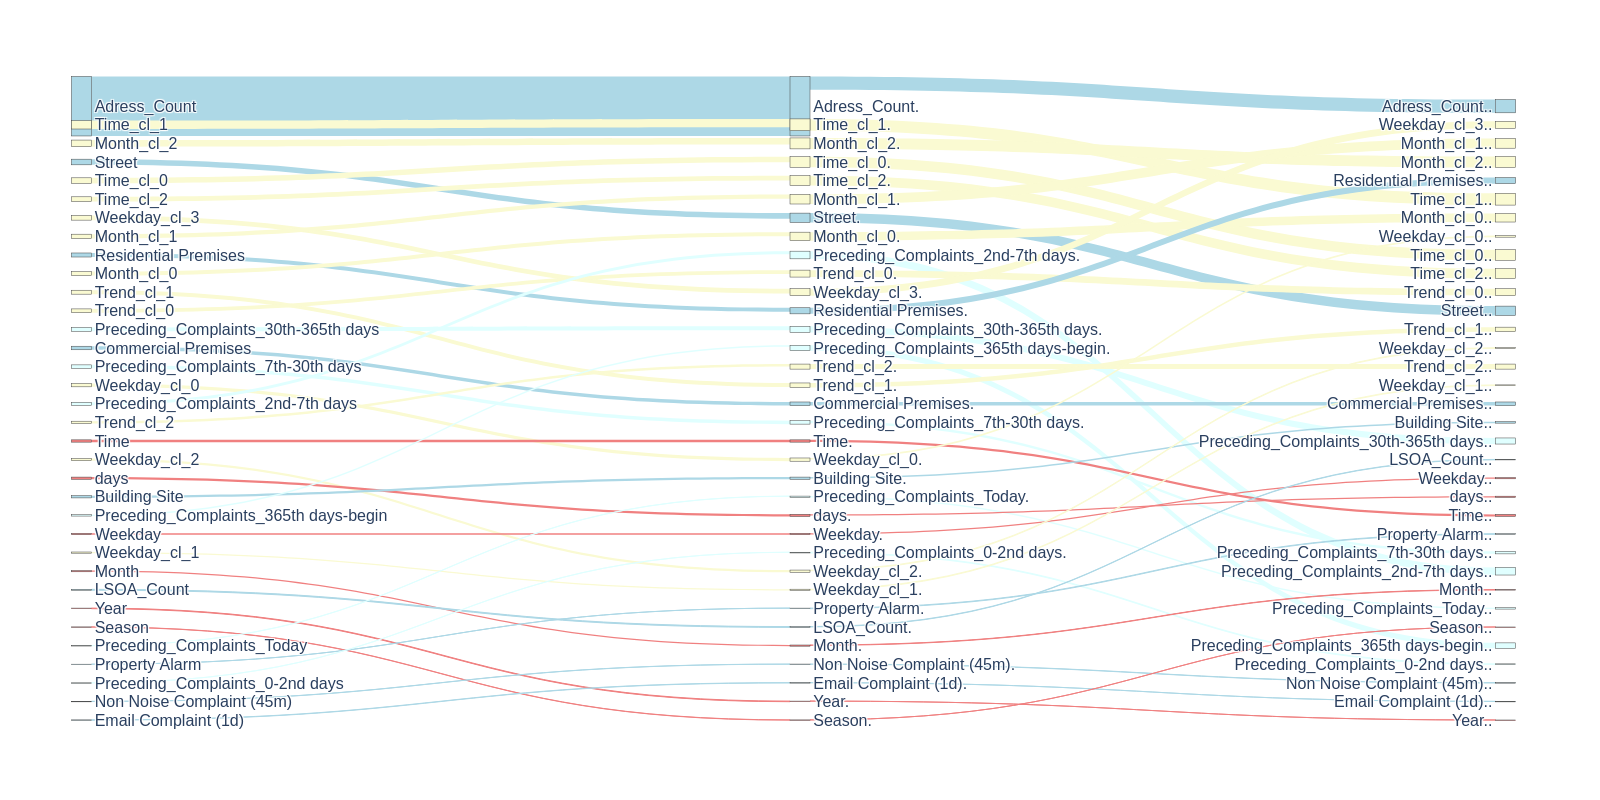

In [939]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import io




from itertools import chain
label = list(chain.from_iterable(zip(df_all_select['Feature_1'],df_all_select['Feature_2'],df_all_select['Feature_3'])))
x = list(chain.from_iterable(zip(df_all_select['x1'],df_all_select['x2'],df_all_select['x3'])))
y = list(chain.from_iterable(zip(df_all_select['x'],df_all_select['y'],df_all_select['z'])))
proportion = list(chain.from_iterable(zip(df_all_select['proportion_1'],df_all_select['proportion_2'],df_all_select['proportion_3'])))
color = list(chain.from_iterable(zip(df_all_select['group_1'],df_all_select['group_2'],df_all_select['group_3'])))
x = [.001 if v==0 else .999 if v==1 else v for v in x]
y = [.001 if v==0 else .999 if v==1 else v for v in y]
nodes = pd.Series(index=label, data=range(len(label)))

fig = go.Figure(
    go.Sankey(
        node={"label": label,
             "color" : color ,
             "x": x,
             "y": y,
             'pad':20,
             'thickness':20},
        link={
            "source": nodes.loc[list(df_all_select["Feature_1"])+list(df_all_select["Feature_2"])],
            "target": nodes.loc[list(df_all_select["Feature_1"]+'.')+list(df_all_select["Feature_2"]+'.')],
            #"target": nodes.loc[df["target"]],
            "value":list(df_all_select['proportion_2'])+list(df_all_select['proportion_3']),
            #"value":list(df_all_select['new_value'])+list(df_all_select['new_value']),
            "color" :  list(df_all_select['link_col_1'])+list(df_all_select['link_col_2']),
            
        },
    )
)



fig.update_layout(font_size=16, autosize=False,
    width=1600,
    height=800,)

fig.show("png") #fig.show()


In [942]:
importance_collection = pd.read_csv('RF_model_importance_timeseries.csv')

In [943]:
importance_collection

,Feature,Importance,Type
0,Adress_Count,0.042928,7-30 days
1,weekday_cl_3,0.038309,7-30 days
2,month_cl_1,0.035576,7-30 days
3,month_cl_2,0.034196,7-30 days
4,Residential Premises,0.031858,7-30 days
...,...,...,...
97,bef_todays_count,0.002429,0-2 days
98,Property Alarm,0.001993,0-2 days
99,bef_yesterday_count,0.001930,0-2 days
100,Non Noise Complaint (45m),0.000000,0-2 days


In [945]:
A = ['LSOA_Count','Adress_Count',
      'Building Site', 'Commercial Premises', 'Email Complaint (1d)','Non Noise Complaint (45m)', 'Property Alarm', 'Residential Premises','Street']

B = ['Year', 'Month', 'Weekday','Season', 'days','Time',]
   
C = ['bef_todays_count','bef_yesterday_count', 'bef_2_7days_count', 'bef_7_30days_count','bef_30_365days_count', 'bef_365_begindays_count', ]

D = ['year_month_cl_0', 'year_month_cl_1','year_month_cl_2', 'month_cl_0', 'month_cl_1', 'month_cl_2',
      
       'time_cl_0', 'time_cl_1', 'time_cl_2', 'weekday_cl_0', 'weekday_cl_1','weekday_cl_2', 'weekday_cl_3', 'weekday_cl_4', 'weekday_cl_5']
      
    
    

In [946]:
A1 = ['LSOA_Count','Adress_Count',
      'Building Site', 'Commercial Premises', 'Email Complaint (1d)','Non Noise Complaint (45m)', 'Property Alarm', 'Residential Premises','Street']

B1 = ['Year', 'Month', 'Weekday','Season', 'days','Time',]
   
C1 = ['Preceding_Complaints_Today','Preceding_Complaints_0-2nd days','Preceding_Complaints_2nd-7th days','Preceding_Complaints_7th-30th days','Preceding_Complaints_30th-365th days','Preceding_Complaints_365th days-begin' ]

D1 = ['Trend_cl_0', 'Trend_cl_1', 'Trend_cl_2','Month_cl_0','Month_cl_1','Month_cl_2','Time_cl_0','Time_cl_1','Time_cl_2','Weekday_cl_0','Weekday_cl_1','Weekday_cl_2', 'Weekday_cl_3',]
      

In [947]:
listnew = A1+B1+C1+D1
listoriginal = A+B+C+D

zipbObj = zip(listoriginal, listnew )
# Create a dictionary from zip object
dictfeature_name = dict(zipbObj)

In [949]:

for e in dictfeature_name.keys():
    importance_collection.loc[importance_collection['Feature'] == e, 'Feature'] = dictfeature_name[e]

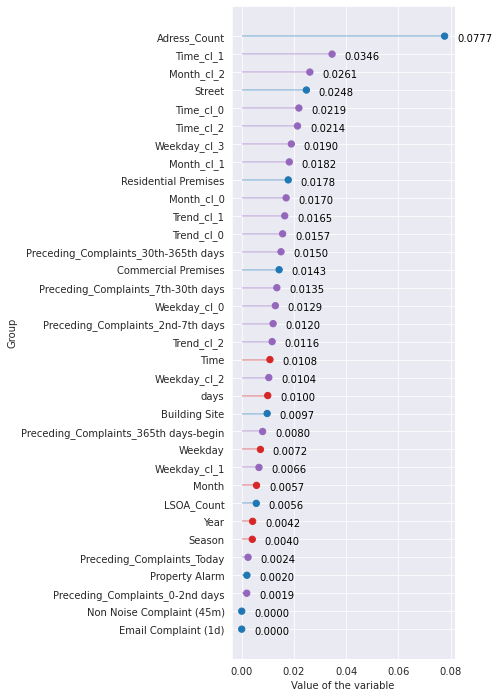

In [950]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(4, 12)) 
# Create a dataframe
df = importance_collection.loc[importance_collection.Type=='0-2 days'].reset_index()
 
# Reorder it based on values:
ordered_df = df.sort_values(by='Importance')
my_range=range(1,len(df.index)+1)
y_list = [*range(1,len(df.index)+1)]
y_list = list(reversed(y_list))
# Create a color if the group is "B"
my_color=np.where(ordered_df ['Feature'].isin(A), 'tab:blue', np.where(ordered_df ['Feature'].isin(B),'tab:red',np.where(ordered_df ['Feature'].isin(C),'tab:green','tab:purple')))
my_size=np.where(ordered_df ['Feature'].isin(A), 40, 40)
 
# The horizontal plot is made using the hline() function
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['Importance'], color=my_color, alpha=0.4)
plt.scatter(ordered_df['Importance'], my_range, color=my_color, s=my_size, alpha=1)
 
    
for i in range(len(df['Importance'])):
    label = "{:.4f}".format(df['Importance'][i])
    plt.annotate(str(label), # this is the text
                 (df['Importance'][i], y_list[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(30,-5), # distance from text to points (x,y)
                 color = 'black',
                 ha='center') # horizontal alignment can be left, right or center  
    
    
# Add title and axis names
plt.yticks(my_range, ordered_df['Feature'])
#plt.title("What about the B group?", loc='left')
plt.xlabel('Value of the variable')
plt.ylabel('Group')

# show the graph
plt.show()

In [951]:
df = importance_collection.loc[importance_collection.Type=='0-2 days'].reset_index()
df

,index,Feature,Importance,Type
0,68,Adress_Count,0.077685,0-2 days
1,69,Time_cl_1,0.034592,0-2 days
2,70,Month_cl_2,0.026092,0-2 days
3,71,Street,0.024753,0-2 days
4,72,Time_cl_0,0.021889,0-2 days
5,73,Time_cl_2,0.021359,0-2 days
6,74,Weekday_cl_3,0.018993,0-2 days
7,75,Month_cl_1,0.018215,0-2 days
8,76,Residential Premises,0.017810,0-2 days
9,77,Month_cl_0,0.017000,0-2 days


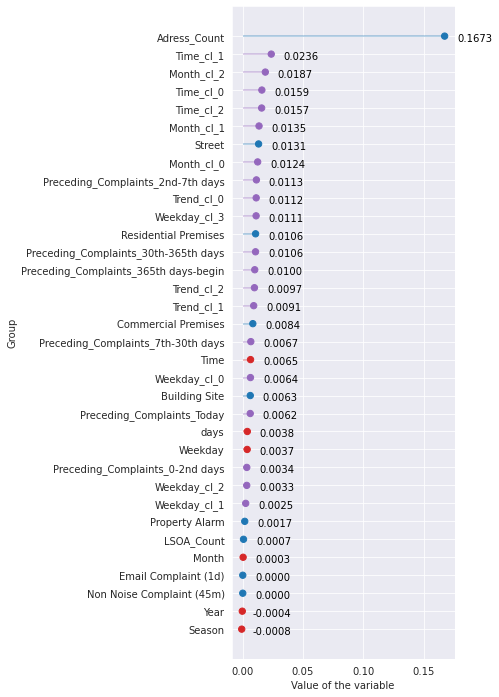

In [952]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(4, 12)) 
# Create a dataframe
df = importance_collection.loc[importance_collection.Type=='2-7 days'].reset_index()
 
# Reorder it based on values:
ordered_df = df.sort_values(by='Importance')
my_range=range(1,len(df.index)+1)
y_list = [*range(1,len(df.index)+1)]
y_list = list(reversed(y_list))
# Create a color if the group is "B"
my_color=np.where(ordered_df ['Feature'].isin(A), 'tab:blue', np.where(ordered_df ['Feature'].isin(B),'tab:red',np.where(ordered_df ['Feature'].isin(C),'tab:green','tab:purple')))
my_size=np.where(ordered_df ['Feature'].isin(A), 40, 40)
 
# The horizontal plot is made using the hline() function
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['Importance'], color=my_color, alpha=0.4)
plt.scatter(ordered_df['Importance'], my_range, color=my_color, s=my_size, alpha=1)
 
    
for i in range(len(df['Importance'])):
    label = "{:.4f}".format(df['Importance'][i])
    plt.annotate(str(label), # this is the text
                 (df['Importance'][i], y_list[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(30,-5), # distance from text to points (x,y)
                 color = 'black',
                 ha='center') # horizontal alignment can be left, right or center  
    
    
# Add title and axis names
plt.yticks(my_range, ordered_df['Feature'])
#plt.title("What about the B group?", loc='left')
plt.xlabel('Value of the variable')
plt.ylabel('Group')

# show the graph
plt.show()

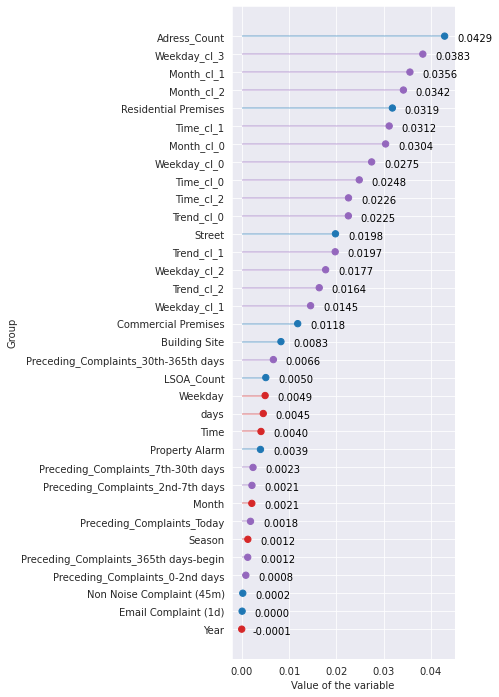

In [953]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(4, 12)) 
# Create a dataframe
df = importance_collection.loc[importance_collection.Type=='7-30 days'].reset_index()
 
# Reorder it based on values:
ordered_df = df.sort_values(by='Importance')
my_range=range(1,len(df.index)+1)
y_list = [*range(1,len(df.index)+1)]
y_list = list(reversed(y_list))
# Create a color if the group is "B"
my_color=np.where(ordered_df ['Feature'].isin(A), 'tab:blue', np.where(ordered_df ['Feature'].isin(B),'tab:red',np.where(ordered_df ['Feature'].isin(C),'tab:green','tab:purple')))
my_size=np.where(ordered_df ['Feature'].isin(A), 40, 40)
 
# The horizontal plot is made using the hline() function
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['Importance'], color=my_color, alpha=0.4)
plt.scatter(ordered_df['Importance'], my_range, color=my_color, s=my_size, alpha=1)
 
    
for i in range(len(df['Importance'])):
    label = "{:.4f}".format(df['Importance'][i])
    plt.annotate(str(label), # this is the text
                 (df['Importance'][i], y_list[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(30,-5), # distance from text to points (x,y)
                 color = 'black',
                 ha='center') # horizontal alignment can be left, right or center  
    
    
# Add title and axis names
plt.yticks(my_range, ordered_df['Feature'])
#plt.title("What about the B group?", loc='left')
plt.xlabel('Value of the variable')
plt.ylabel('Group')
#plt.legend(['A','B','C','D'])
# show the graph
plt.show()

In [954]:
importance_collection = pd.read_csv('RF_model_importance_timeseries_ordinary.csv')

In [955]:
importance_collection

,Feature,Importance,Type
0,Adress_Count,0.103772,7-30 days
1,Residential Premises,0.080758,7-30 days
2,Street,0.045182,7-30 days
3,Commercial Premises,0.030760,7-30 days
4,bef_30_365days_count,0.030140,7-30 days
...,...,...,...
97,bef_todays_count,0.003550,0-2 days
98,bef_yesterday_count,0.002865,0-2 days
99,weekday_cl_1,0.001837,0-2 days
100,Non Noise Complaint (45m),0.000156,0-2 days


In [956]:
A = ['LSOA_Count','Adress_Count',
      'Building Site', 'Commercial Premises', 'Email Complaint (1d)','Non Noise Complaint (45m)', 'Property Alarm', 'Residential Premises','Street']

B = ['Year', 'Month', 'Weekday','Season', 'days','Time',]
   
C = ['bef_todays_count','bef_yesterday_count', 'bef_2_7days_count', 'bef_7_30days_count','bef_30_365days_count', 'bef_365_begindays_count', ]

D = ['year_month_cl_0', 'year_month_cl_1','year_month_cl_2', 'month_cl_0', 'month_cl_1', 'month_cl_2',
      
       'time_cl_0', 'time_cl_1', 'time_cl_2', 'weekday_cl_0', 'weekday_cl_1','weekday_cl_2', 'weekday_cl_3', 'weekday_cl_4', 'weekday_cl_5']
      
    
    

In [957]:
A1 = ['LSOA_Count','Adress_Count',
      'Building Site', 'Commercial Premises', 'Email Complaint (1d)','Non Noise Complaint (45m)', 'Property Alarm', 'Residential Premises','Street']

B1 = ['Year', 'Month', 'Weekday','Season', 'days','Time',]
   
C1 = ['Preceding_Complaints_Today','Preceding_Complaints_0-2nd days','Preceding_Complaints_2nd-7th days','Preceding_Complaints_7th-30th days','Preceding_Complaints_30th-365th days','Preceding_Complaints_365th days-begin' ]

D1 = ['Trend_cl_0', 'Trend_cl_1', 'Trend_cl_2','Month_cl_0','Month_cl_1','Month_cl_2','Time_cl_0','Time_cl_1','Time_cl_2','Weekday_cl_0','Weekday_cl_1','Weekday_cl_2', 'Weekday_cl_3',]
      

In [958]:
listnew = A1+B1+C1+D1
listoriginal = A+B+C+D

zipbObj = zip(listoriginal, listnew )
# Create a dictionary from zip object
dictfeature_name = dict(zipbObj)

In [959]:

for e in dictfeature_name.keys():
    importance_collection.loc[importance_collection['Feature'] == e, 'Feature'] = dictfeature_name[e]

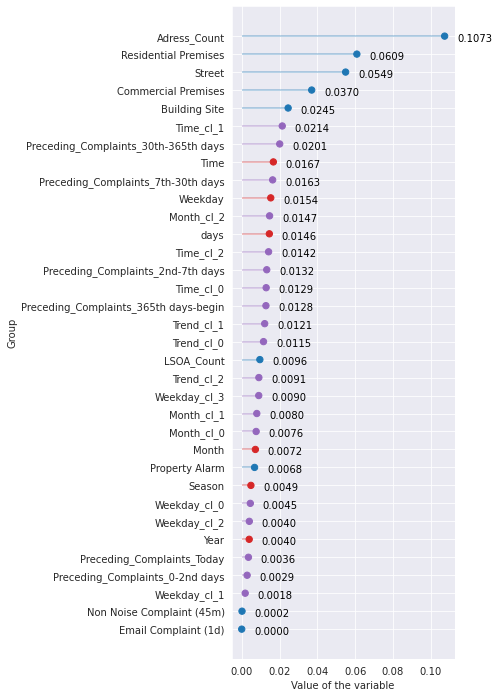

In [960]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(4, 12)) 
# Create a dataframe
df = importance_collection.loc[importance_collection.Type=='0-2 days'].reset_index()
 
# Reorder it based on values:
ordered_df = df.sort_values(by='Importance')
my_range=range(1,len(df.index)+1)
y_list = [*range(1,len(df.index)+1)]
y_list = list(reversed(y_list))
# Create a color if the group is "B"
my_color=np.where(ordered_df ['Feature'].isin(A), 'tab:blue', np.where(ordered_df ['Feature'].isin(B),'tab:red',np.where(ordered_df ['Feature'].isin(C),'tab:green','tab:purple')))
my_size=np.where(ordered_df ['Feature'].isin(A), 40, 40)
 
# The horizontal plot is made using the hline() function
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['Importance'], color=my_color, alpha=0.4)
plt.scatter(ordered_df['Importance'], my_range, color=my_color, s=my_size, alpha=1)
 
    
for i in range(len(df['Importance'])):
    label = "{:.4f}".format(df['Importance'][i])
    plt.annotate(str(label), # this is the text
                 (df['Importance'][i], y_list[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(30,-5), # distance from text to points (x,y)
                 color = 'black',
                 ha='center') # horizontal alignment can be left, right or center  
    
    
# Add title and axis names
plt.yticks(my_range, ordered_df['Feature'])
#plt.title("What about the B group?", loc='left')
plt.xlabel('Value of the variable')
plt.ylabel('Group')

# show the graph
plt.show()

In [961]:
df = importance_collection.loc[importance_collection.Type=='0-2 days'].reset_index()
df

,index,Feature,Importance,Type
0,68,Adress_Count,0.107264,0-2 days
1,69,Residential Premises,0.060871,0-2 days
2,70,Street,0.054924,0-2 days
3,71,Commercial Premises,0.036990,0-2 days
4,72,Building Site,0.024535,0-2 days
5,73,Time_cl_1,0.021422,0-2 days
6,74,Preceding_Complaints_30th-365th days,0.020083,0-2 days
7,75,Time,0.016720,0-2 days
8,76,Preceding_Complaints_7th-30th days,0.016346,0-2 days
9,77,Weekday,0.015350,0-2 days


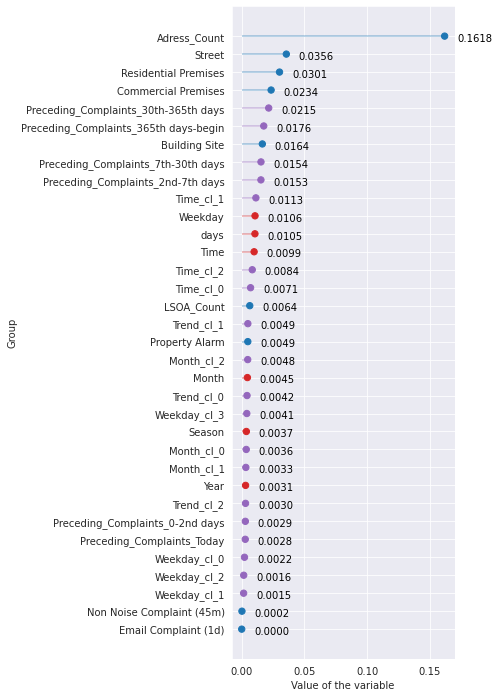

In [962]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(4, 12)) 
# Create a dataframe
df = importance_collection.loc[importance_collection.Type=='2-7 days'].reset_index()
 
# Reorder it based on values:
ordered_df = df.sort_values(by='Importance')
my_range=range(1,len(df.index)+1)
y_list = [*range(1,len(df.index)+1)]
y_list = list(reversed(y_list))
# Create a color if the group is "B"
my_color=np.where(ordered_df ['Feature'].isin(A), 'tab:blue', np.where(ordered_df ['Feature'].isin(B),'tab:red',np.where(ordered_df ['Feature'].isin(C),'tab:green','tab:purple')))
my_size=np.where(ordered_df ['Feature'].isin(A), 40, 40)
 
# The horizontal plot is made using the hline() function
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['Importance'], color=my_color, alpha=0.4)
plt.scatter(ordered_df['Importance'], my_range, color=my_color, s=my_size, alpha=1)
 
    
for i in range(len(df['Importance'])):
    label = "{:.4f}".format(df['Importance'][i])
    plt.annotate(str(label), # this is the text
                 (df['Importance'][i], y_list[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(30,-5), # distance from text to points (x,y)
                 color = 'black',
                 ha='center') # horizontal alignment can be left, right or center  
    
    
# Add title and axis names
plt.yticks(my_range, ordered_df['Feature'])
#plt.title("What about the B group?", loc='left')
plt.xlabel('Value of the variable')
plt.ylabel('Group')

# show the graph
plt.show()

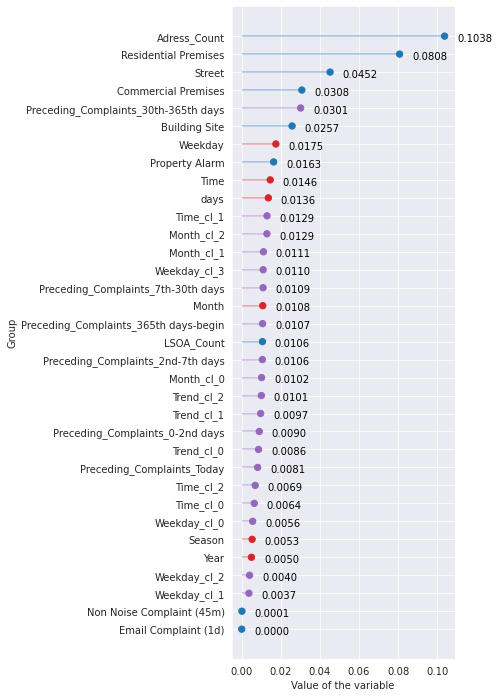

In [963]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(4, 12)) 
# Create a dataframe
df = importance_collection.loc[importance_collection.Type=='7-30 days'].reset_index()
 
# Reorder it based on values:
ordered_df = df.sort_values(by='Importance')
my_range=range(1,len(df.index)+1)
y_list = [*range(1,len(df.index)+1)]
y_list = list(reversed(y_list))
# Create a color if the group is "B"
my_color=np.where(ordered_df ['Feature'].isin(A), 'tab:blue', np.where(ordered_df ['Feature'].isin(B),'tab:red',np.where(ordered_df ['Feature'].isin(C),'tab:green','tab:purple')))
my_size=np.where(ordered_df ['Feature'].isin(A), 40, 40)
 
# The horizontal plot is made using the hline() function
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['Importance'], color=my_color, alpha=0.4)
plt.scatter(ordered_df['Importance'], my_range, color=my_color, s=my_size, alpha=1)
 
    
for i in range(len(df['Importance'])):
    label = "{:.4f}".format(df['Importance'][i])
    plt.annotate(str(label), # this is the text
                 (df['Importance'][i], y_list[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(30,-5), # distance from text to points (x,y)
                 color = 'black',
                 ha='center') # horizontal alignment can be left, right or center  
    
    
# Add title and axis names
plt.yticks(my_range, ordered_df['Feature'])
#plt.title("What about the B group?", loc='left')
plt.xlabel('Value of the variable')
plt.ylabel('Group')
#plt.legend(['A','B','C','D'])
# show the graph
plt.show()